<a href="https://colab.research.google.com/github/dajley/Analyzing-Outliers/blob/main/Z_Score_on_North_Dakota_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Handling Outliers with Z-Score on Agricultural Dataset
#Code by Dajanique Leysath

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#imports file from device
#from google.colab import files
#import io

#saves file as data
#data = files.upload()

In [ ]:
#mounts google drive to google colab
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#saves cvs file into dataframe
df = pd.read_csv('/content/drive/MyDrive/Datasets/Combined County Data Cleansed.csv')

In [ ]:
#saves cvs file into dataframe
#df = pd.read_csv(io.StringIO(data['Combined County Data Cleansed.csv'].decode('utf-8')))

In [ ]:
#shows basic summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Value               286 non-null    float64
 1   Avg Max Temp        286 non-null    float64
 2   Avg Min Temp        286 non-null    float64
 3   Avg Temp            286 non-null    float64
 4   Avg Bare Soil Temp  286 non-null    float64
 5   Avg Turf Soil Temp  286 non-null    float64
 6   Avg Wind Speed      286 non-null    float64
 7   Avg Max Wind Speed  286 non-null    float64
 8   Total Solar Rad     286 non-null    float64
 9   Avg Penman PET      286 non-null    float64
 10  Total Penman PET    286 non-null    float64
 11  Total Rainfall      286 non-null    float64
 12  Avg Dew Point       286 non-null    float64
 13  Avg Wind Chill      286 non-null    float64
dtypes: float64(14)
memory usage: 31.4 KB


In [ ]:
#shows descriptives statistics of dataset
df.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.866484,25.079365,448.886152,0.198280,6.067767,1.883360,34.407533,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,1.259208,2.396947,32.467450,0.027049,0.827335,1.055247,3.096325,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,7.519000,18.379000,362.750000,0.138500,4.244000,0.192500,26.804500,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.031375,23.834875,427.737875,0.180500,5.535125,0.970000,32.714625,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500,25.149250,446.897000,0.202250,6.168250,1.707250,34.651500,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,10.669875,26.591375,475.160500,0.218500,6.685500,2.514125,36.387750,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,14.441500,36.001000,536.538000,0.248500,7.669000,6.194500,42.040500,52.869500


In [ ]:
#used to find if there were any null values
df.isnull().sum()

,0
Value,0
Avg Max Temp,0
Avg Min Temp,0
Avg Temp,0
Avg Bare Soil Temp,0
Avg Turf Soil Temp,0
Avg Wind Speed,0
Avg Max Wind Speed,0
Total Solar Rad,0
Avg Penman PET,0


In [ ]:
#shows how many unique values are in each feature
df.nunique()

,0
Value,250
Avg Max Temp,198
Avg Min Temp,198
Avg Temp,197
Avg Bare Soil Temp,197
Avg Turf Soil Temp,197
Avg Wind Speed,194
Avg Max Wind Speed,195
Total Solar Rad,198
Avg Penman PET,132


In [ ]:
#sorts first 10 rows of data by Rainfall from lowest to highest
df.sort_values(by='Total Rainfall').head(10)

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
231,128.0,59.9805,31.9250,45.9530,49.6965,37.8085,11.2915,27.6480,475.4230,0.2390,7.3115,0.1925,28.3810,41.9850
267,135.0,59.9805,31.9250,45.9530,49.6965,37.8085,11.2915,27.6480,475.4230,0.2390,7.3115,0.1925,28.3810,41.9850
75,56.0,58.7670,34.4565,46.6120,48.9960,47.1570,11.2255,27.4440,494.7285,0.2175,6.6640,0.2200,32.5530,42.0080
74,75.0,65.8865,39.5505,52.7185,53.3670,51.5175,9.3090,24.3665,480.6920,0.2485,7.5990,0.3500,34.7100,50.5205
128,89.3,58.2885,33.7975,46.0435,50.2135,43.8400,8.3980,23.1995,536.5380,0.2225,6.8230,0.3650,31.1530,42.8305
129,85.9,61.7870,36.4205,49.1040,54.7320,49.4570,8.6165,24.4825,509.3910,0.2290,7.0250,0.3860,32.8705,46.7485
159,102.3,61.7870,36.4205,49.1040,54.7320,49.4570,8.6165,24.4825,509.3910,0.2290,7.0250,0.3860,32.8705,46.7485
177,50.1,57.4625,33.7810,45.6220,47.9130,48.4295,10.5850,36.0010,501.9655,0.2240,6.8680,0.4300,29.9440,40.5950
146,56.8,57.4625,33.7810,45.6220,47.9130,48.4295,10.5850,36.0010,501.9655,0.2240,6.8680,0.4300,29.9440,40.5950
102,92.4,54.0505,34.7905,44.4205,42.9710,42.8235,9.2340,23.7400,472.9260,0.1720,5.3000,0.4645,33.6100,40.0880


In [ ]:
#sorts first first 10 rows of data by Rainfall from highest to lowest
df.sort_values(by='Total Rainfall', ascending=False).head(10)

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
216,110.1,64.0375,41.0345,52.5360,50.3900,47.5590,9.3195,19.2625,395.6705,0.2060,6.2960,6.1945,38.3290,49.8875
186,170.9,52.0810,36.0740,44.0780,43.9385,41.9180,10.2645,27.3855,362.7500,0.1515,4.6535,5.1585,36.1040,39.4445
226,97.0,52.8815,32.4660,42.6740,43.1510,39.9030,12.0290,26.7125,450.5080,0.1710,5.2510,5.0360,32.8115,36.5620
262,136.5,52.8815,32.4660,42.6740,43.1510,39.9030,12.0290,26.7125,450.5080,0.1710,5.2510,5.0360,32.8115,36.5620
24,95.4,55.7010,33.1025,44.4020,48.2640,48.1600,9.4060,24.2260,451.9825,0.1825,5.5865,4.8550,30.9200,40.6535
255,171.4,52.2895,34.2715,43.2800,44.2645,41.4180,12.3325,30.1125,385.8135,0.1585,4.8600,4.4565,35.1335,37.1750
219,142.8,52.2895,34.2715,43.2800,44.2645,41.4180,12.3325,30.1125,385.8135,0.1585,4.8600,4.4565,35.1335,37.1750
136,78.4,61.0855,37.1660,49.1255,50.5945,49.8340,9.8550,25.2015,441.0925,0.2065,6.3005,4.3975,35.1435,45.9545
167,87.9,61.0855,37.1660,49.1255,50.5945,49.8340,9.8550,25.2015,441.0925,0.2065,6.3005,4.3975,35.1435,45.9545
163,119.1,50.5005,30.8215,40.6615,42.2940,40.8265,9.7180,23.9390,463.4935,0.1560,4.7860,4.3755,30.5430,35.9745


In [ ]:
#sorts first first 10 rows of data by Avg Temp from highest to lowest
df.sort_values(by='Avg Temp', ascending=False).head(10)

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
217,92.5,67.9940,41.1110,54.5530,55.9950,52.8470,8.8520,19.002,510.5340,0.2430,7.5330,1.478,39.1650,51.7660
209,118.0,66.5120,42.0165,54.2645,53.8985,52.1715,7.6460,21.735,482.6090,0.2150,6.5735,1.155,40.0005,52.8695
81,70.0,66.0780,41.9330,54.0060,57.4040,55.5560,9.3950,21.941,531.7970,0.2470,7.6690,1.791,38.5010,52.4170
197,146.4,64.8280,42.0700,53.4490,52.8685,49.1385,7.5330,22.850,418.5265,0.1920,5.8635,2.870,38.8715,52.4890
201,120.7,64.2605,42.3685,53.3145,53.1385,54.5610,8.0405,22.398,406.3445,0.1820,5.5515,1.625,42.0405,51.4725
285,84.3,66.9080,39.7150,53.3110,55.6660,55.4350,10.3930,21.039,489.4340,0.2410,7.4770,0.584,39.3580,51.2690
249,67.5,66.9080,39.7150,53.3110,55.6660,55.4350,10.3930,21.039,489.4340,0.2410,7.4770,0.584,39.3580,51.2690
67,76.3,66.1745,40.2915,53.2330,53.6605,53.5865,9.7625,25.821,436.2580,0.2285,6.9910,2.560,37.0045,50.6285
184,53.1,65.3120,41.0810,53.1960,53.8190,54.9710,8.8290,20.823,482.2140,0.2210,6.8650,2.678,38.4320,50.9990
153,51.6,65.3120,41.0810,53.1960,53.8190,54.9710,8.8290,20.823,482.2140,0.2210,6.8650,2.678,38.4320,50.9990


In [ ]:
#shows how correlated each feature is to each other
df.corr()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
Value,1.000000,-0.114121,0.017959,-0.061331,-0.228821,-0.332270,0.027308,0.109507,-0.150490,-0.207645,-0.206967,0.179414,0.136577,-0.067075
Avg Max Temp,-0.114121,1.000000,0.724030,0.949316,0.849990,0.684369,-0.224368,-0.247643,0.290263,0.738079,0.737178,-0.135603,0.382225,0.957011
Avg Min Temp,0.017959,0.724030,1.000000,0.903980,0.606540,0.583659,-0.111692,-0.297559,-0.096499,0.249618,0.249573,0.225344,0.791173,0.858445
Avg Temp,-0.061331,0.949316,0.903980,1.000000,0.803402,0.690781,-0.189896,-0.287289,0.136503,0.571274,0.570678,0.018768,0.596849,0.984258
Avg Bare Soil Temp,-0.228821,0.849990,0.606540,0.803402,1.000000,0.799243,-0.279467,-0.188760,0.319015,0.633735,0.632258,-0.141759,0.301400,0.837696
Avg Turf Soil Temp,-0.332270,0.684369,0.583659,0.690781,0.799243,1.000000,-0.287460,-0.211398,0.214323,0.486544,0.486589,-0.068161,0.245580,0.721284
Avg Wind Speed,0.027308,-0.224368,-0.111692,-0.189896,-0.279467,-0.287460,1.000000,0.647293,-0.093411,0.079313,0.078896,0.215829,-0.033135,-0.317008
Avg Max Wind Speed,0.109507,-0.247643,-0.297559,-0.287289,-0.188760,-0.211398,0.647293,1.000000,0.065805,0.141740,0.136886,0.051453,-0.327432,-0.332997
Total Solar Rad,-0.150490,0.290263,-0.096499,0.136503,0.319015,0.214323,-0.093411,0.065805,1.000000,0.602456,0.609541,-0.464572,-0.285443,0.162490
Avg Penman PET,-0.207645,0.738079,0.249618,0.571274,0.633735,0.486544,0.079313,0.141740,0.602456,1.000000,0.999686,-0.314908,-0.221080,0.579469


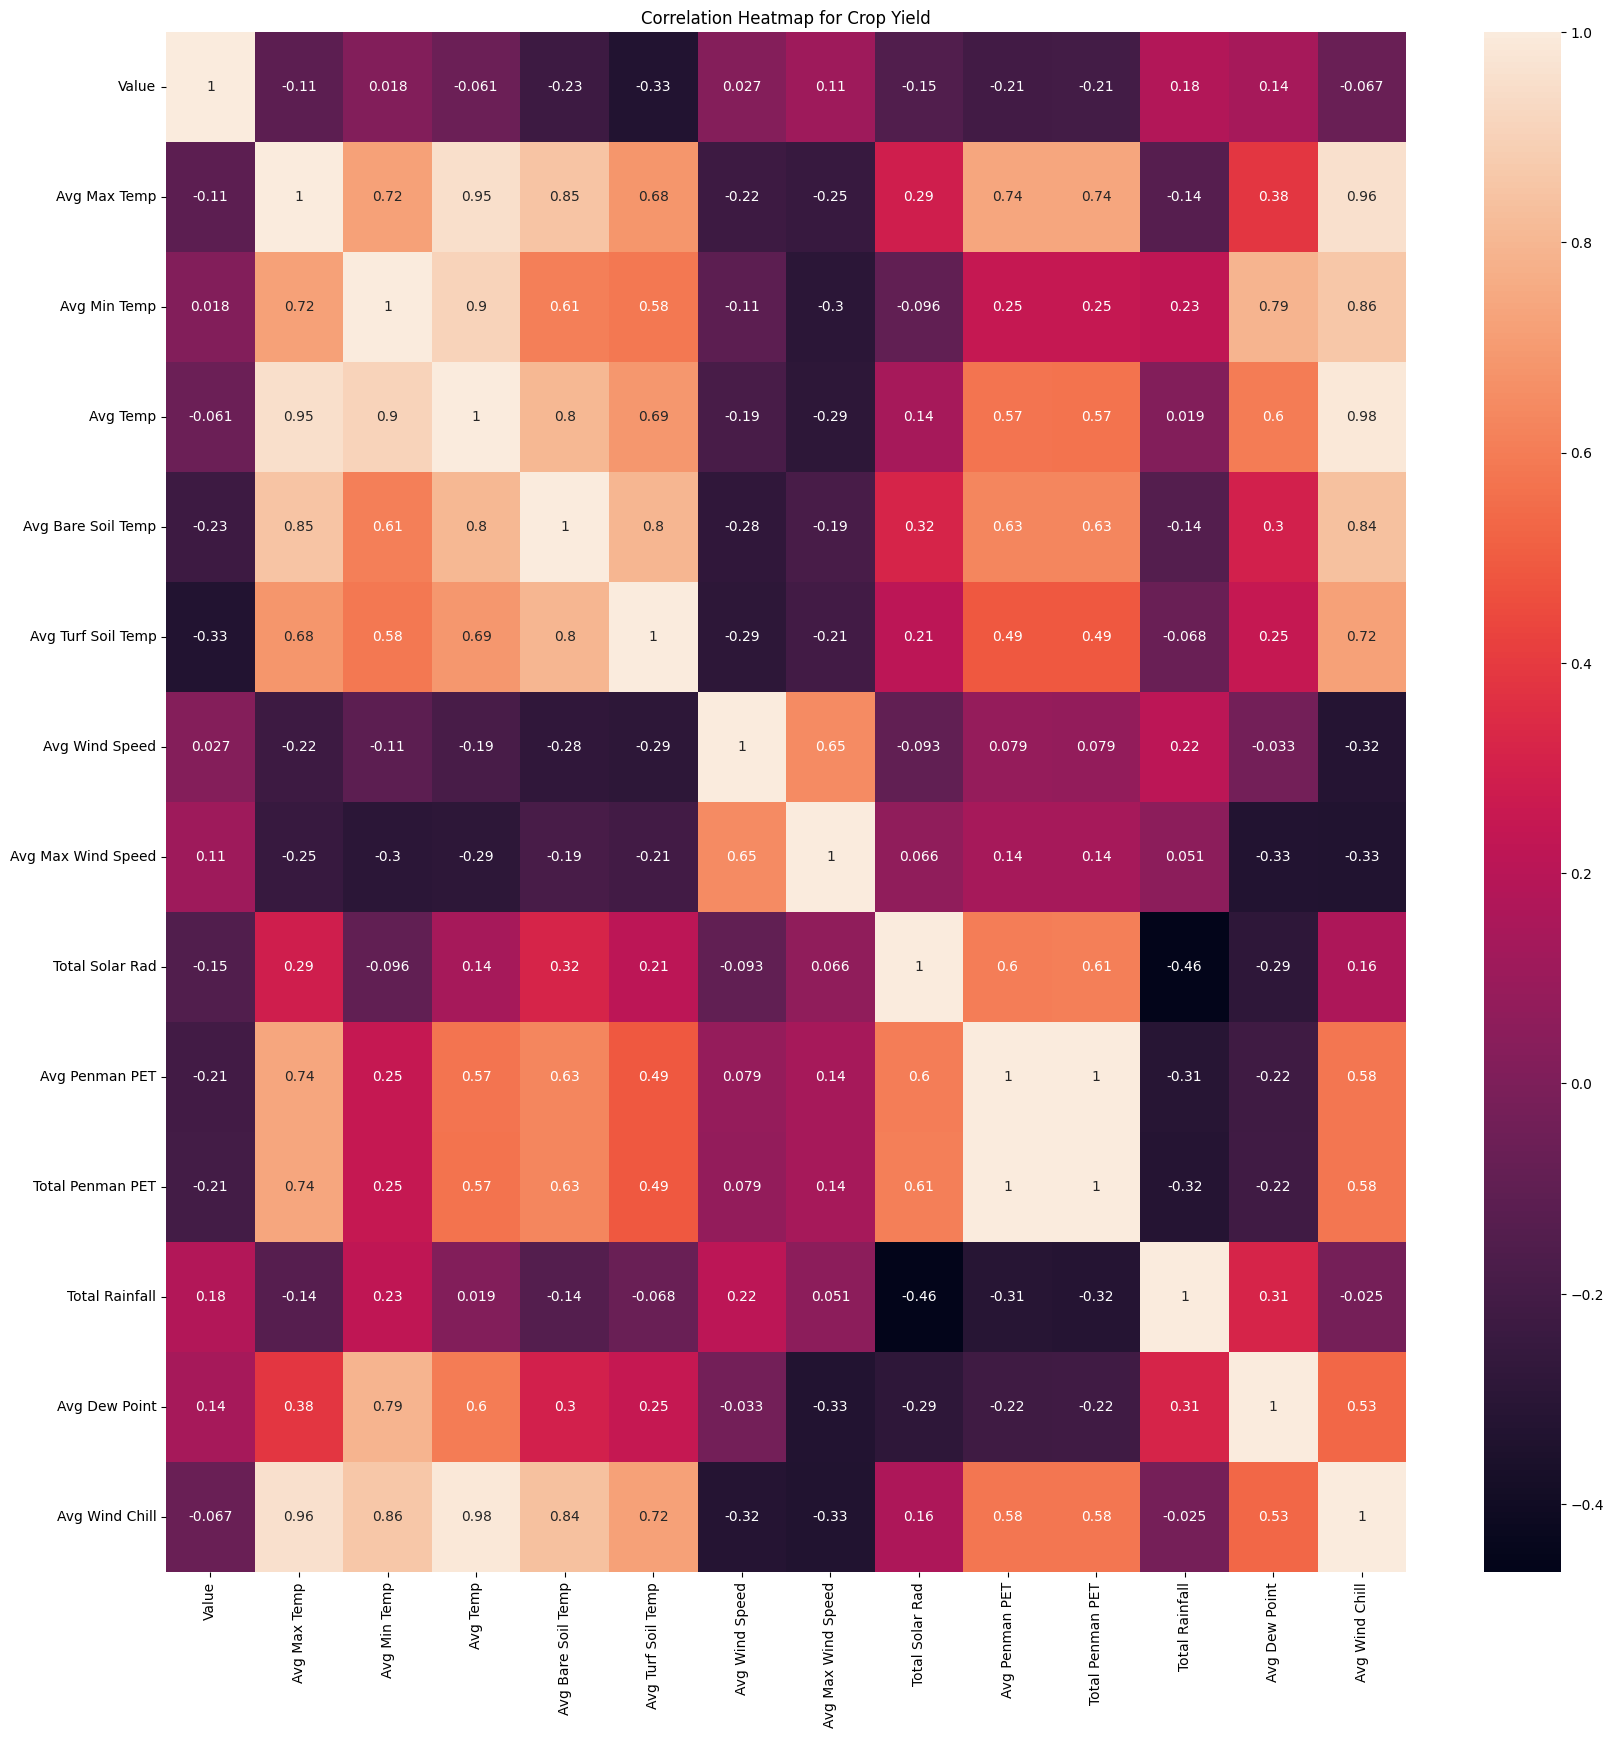

In [ ]:
#shows heatmap of correlation between features
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap for Crop Yield")

#adjusts size of heatmap
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

Correlation strengths (direction does not matter):

*   Strong Correlation: x > 0.5
*   Moderate Correlation: 0.3 < x < 0.5
*   Weak Correlation: x < 0.3

Which features are most correlated with crop yield?

Moderate Correlation:
*   Avg Turf Soil Temp

Weak Correlation:
*   Avg Bare Soil Temp
*   Avg Penman PET
*   Total Penman PET
*   Total Rainfall
*   Avg Dew Point
*   Avg Max Temp
*   Avg Max Wind Speed

Are there missing values or outliers in key variables (e.g., soil pH, rainfall)?

Are there interactions between features (e.g., temperature + rainfall)?

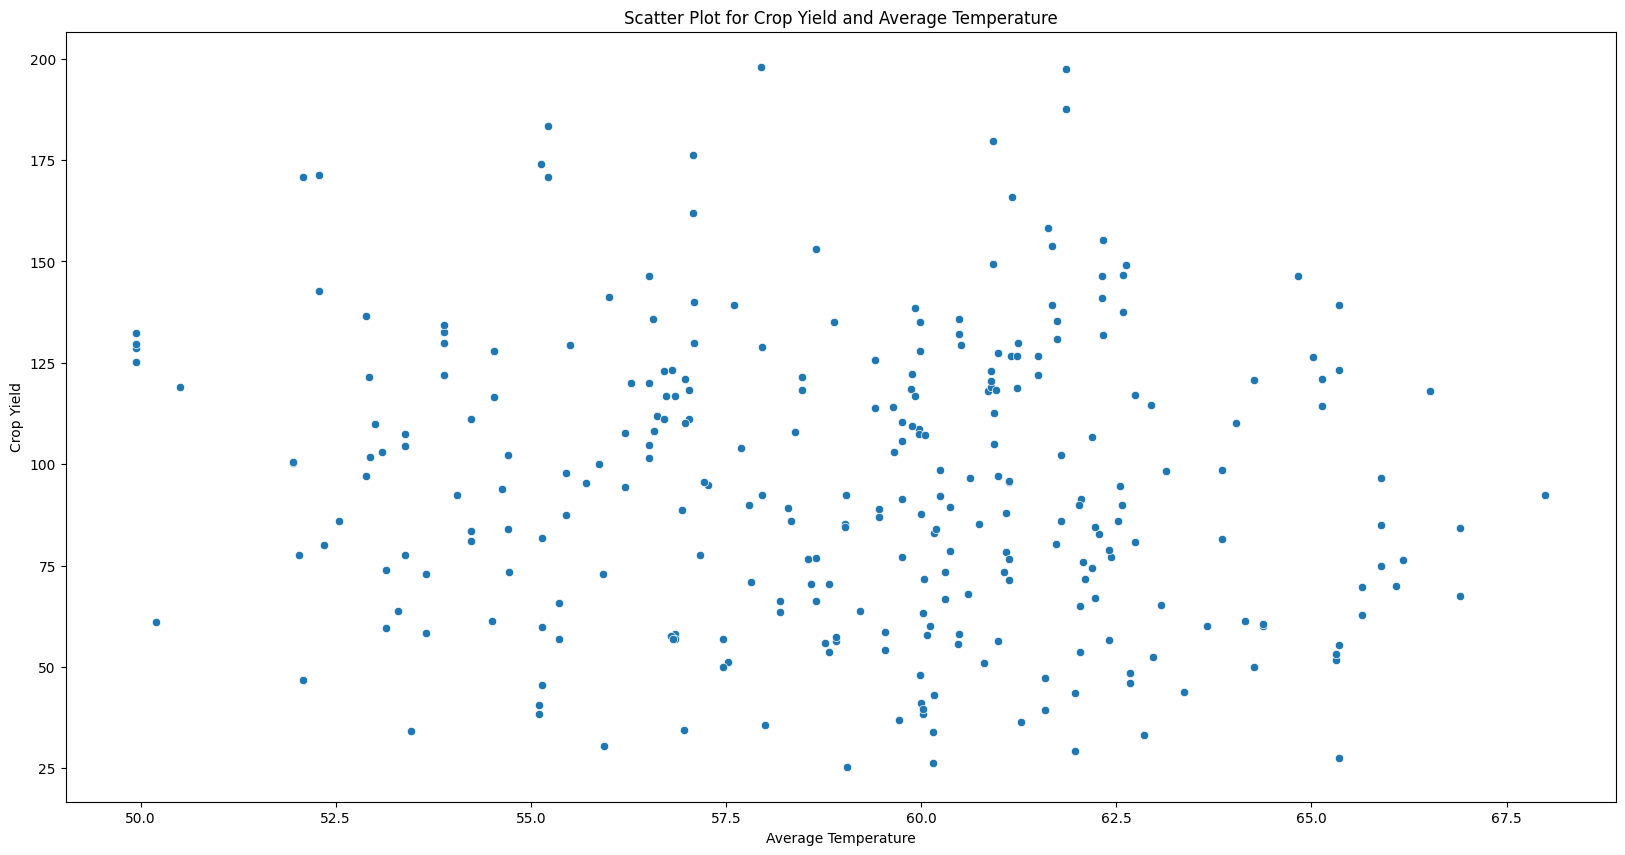

In [ ]:
#creates scatterplot for Avg Min Temp and Crop Value (lowest correlation)
sns.scatterplot( data=df, x='Avg Max Temp', y='Value')

plt.title('Scatter Plot for Crop Yield and Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Crop Yield')

plt.show()

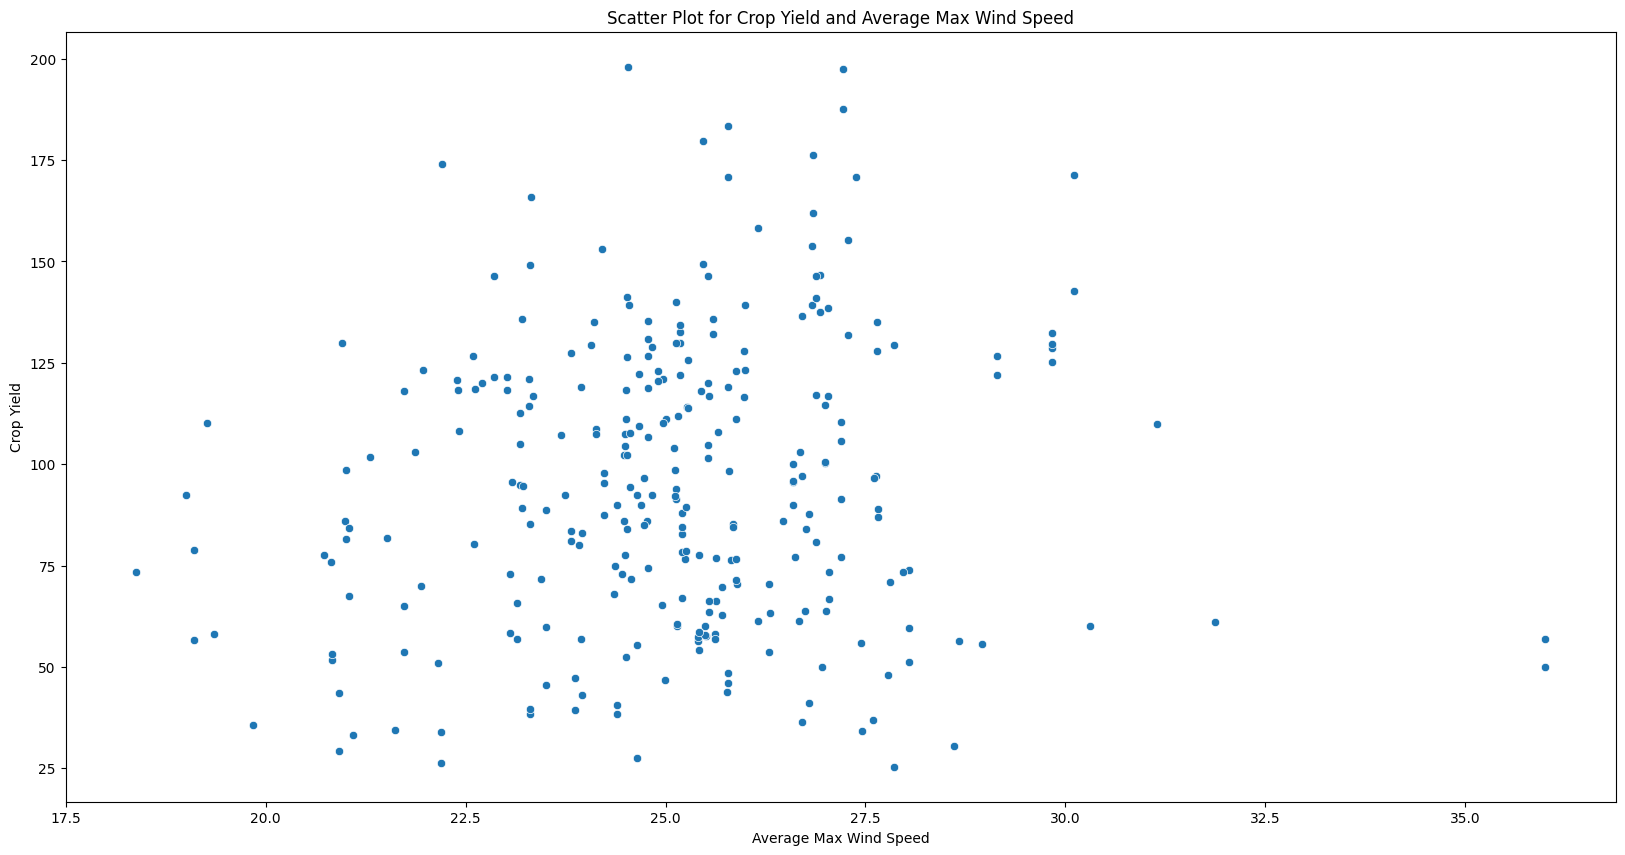

In [ ]:
#creates scatterplot for Avg Max Wnd Speed and Crop Value (low correlation)
sns.scatterplot( data=df, x='Avg Max Wind Speed', y='Value')

plt.title('Scatter Plot for Crop Yield and Average Max Wind Speed')
plt.xlabel('Average Max Wind Speed')
plt.ylabel('Crop Yield')

plt.show()

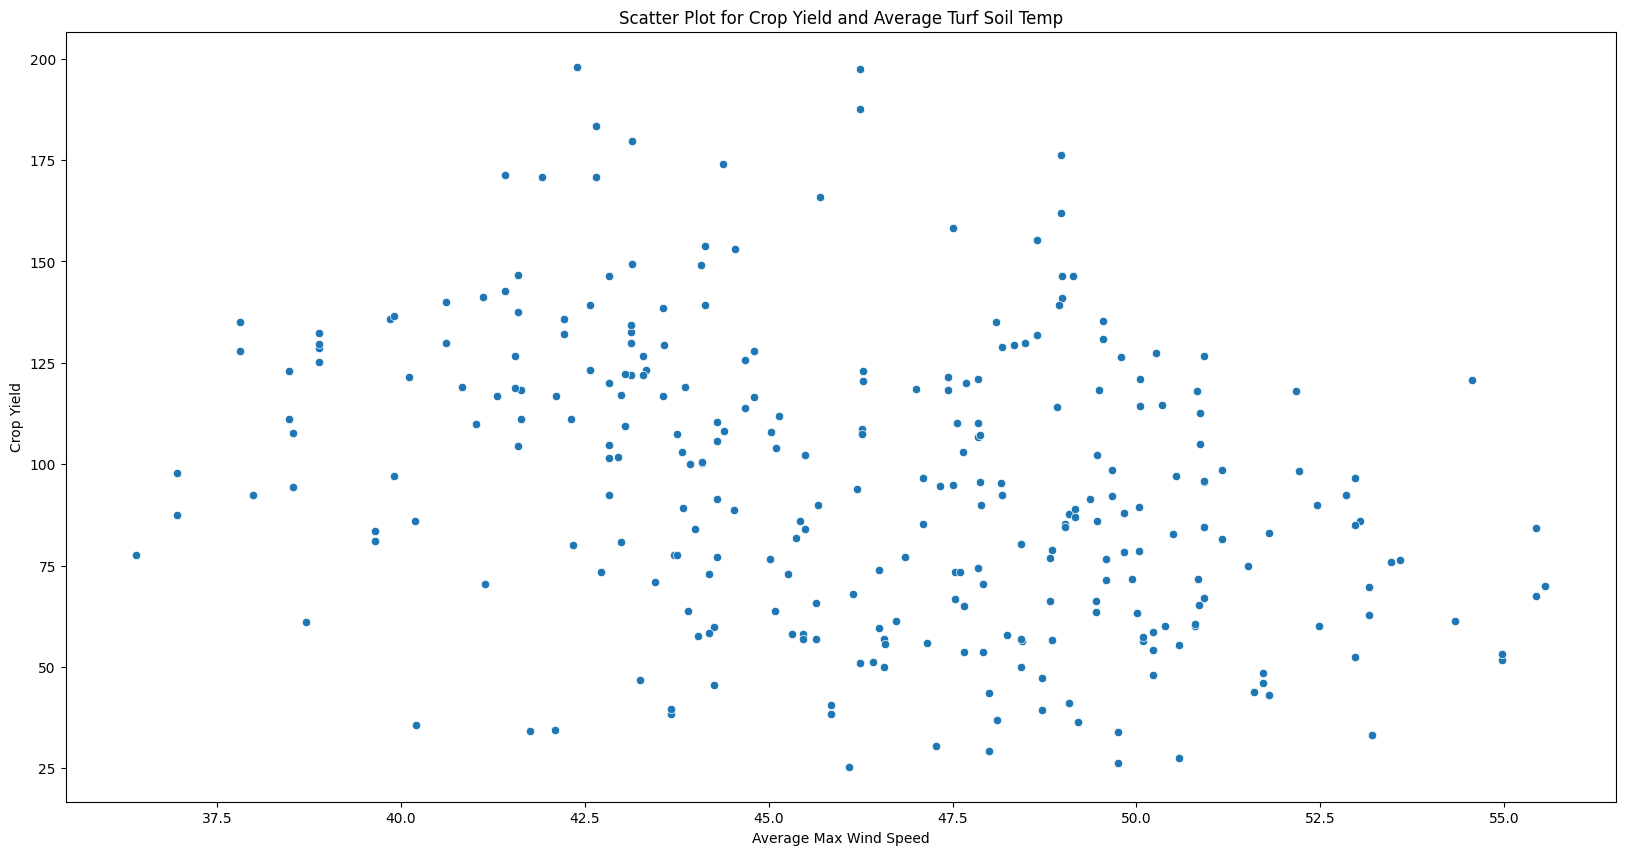

In [ ]:
#creates scatterplot for Avg Turf Soil Temp and Crop Value (highest correlation)
sns.scatterplot( data=df, x='Avg Turf Soil Temp', y='Value')

plt.title('Scatter Plot for Crop Yield and Average Turf Soil Temp')
plt.xlabel('Average Max Wind Speed')
plt.ylabel('Crop Yield')

plt.show()

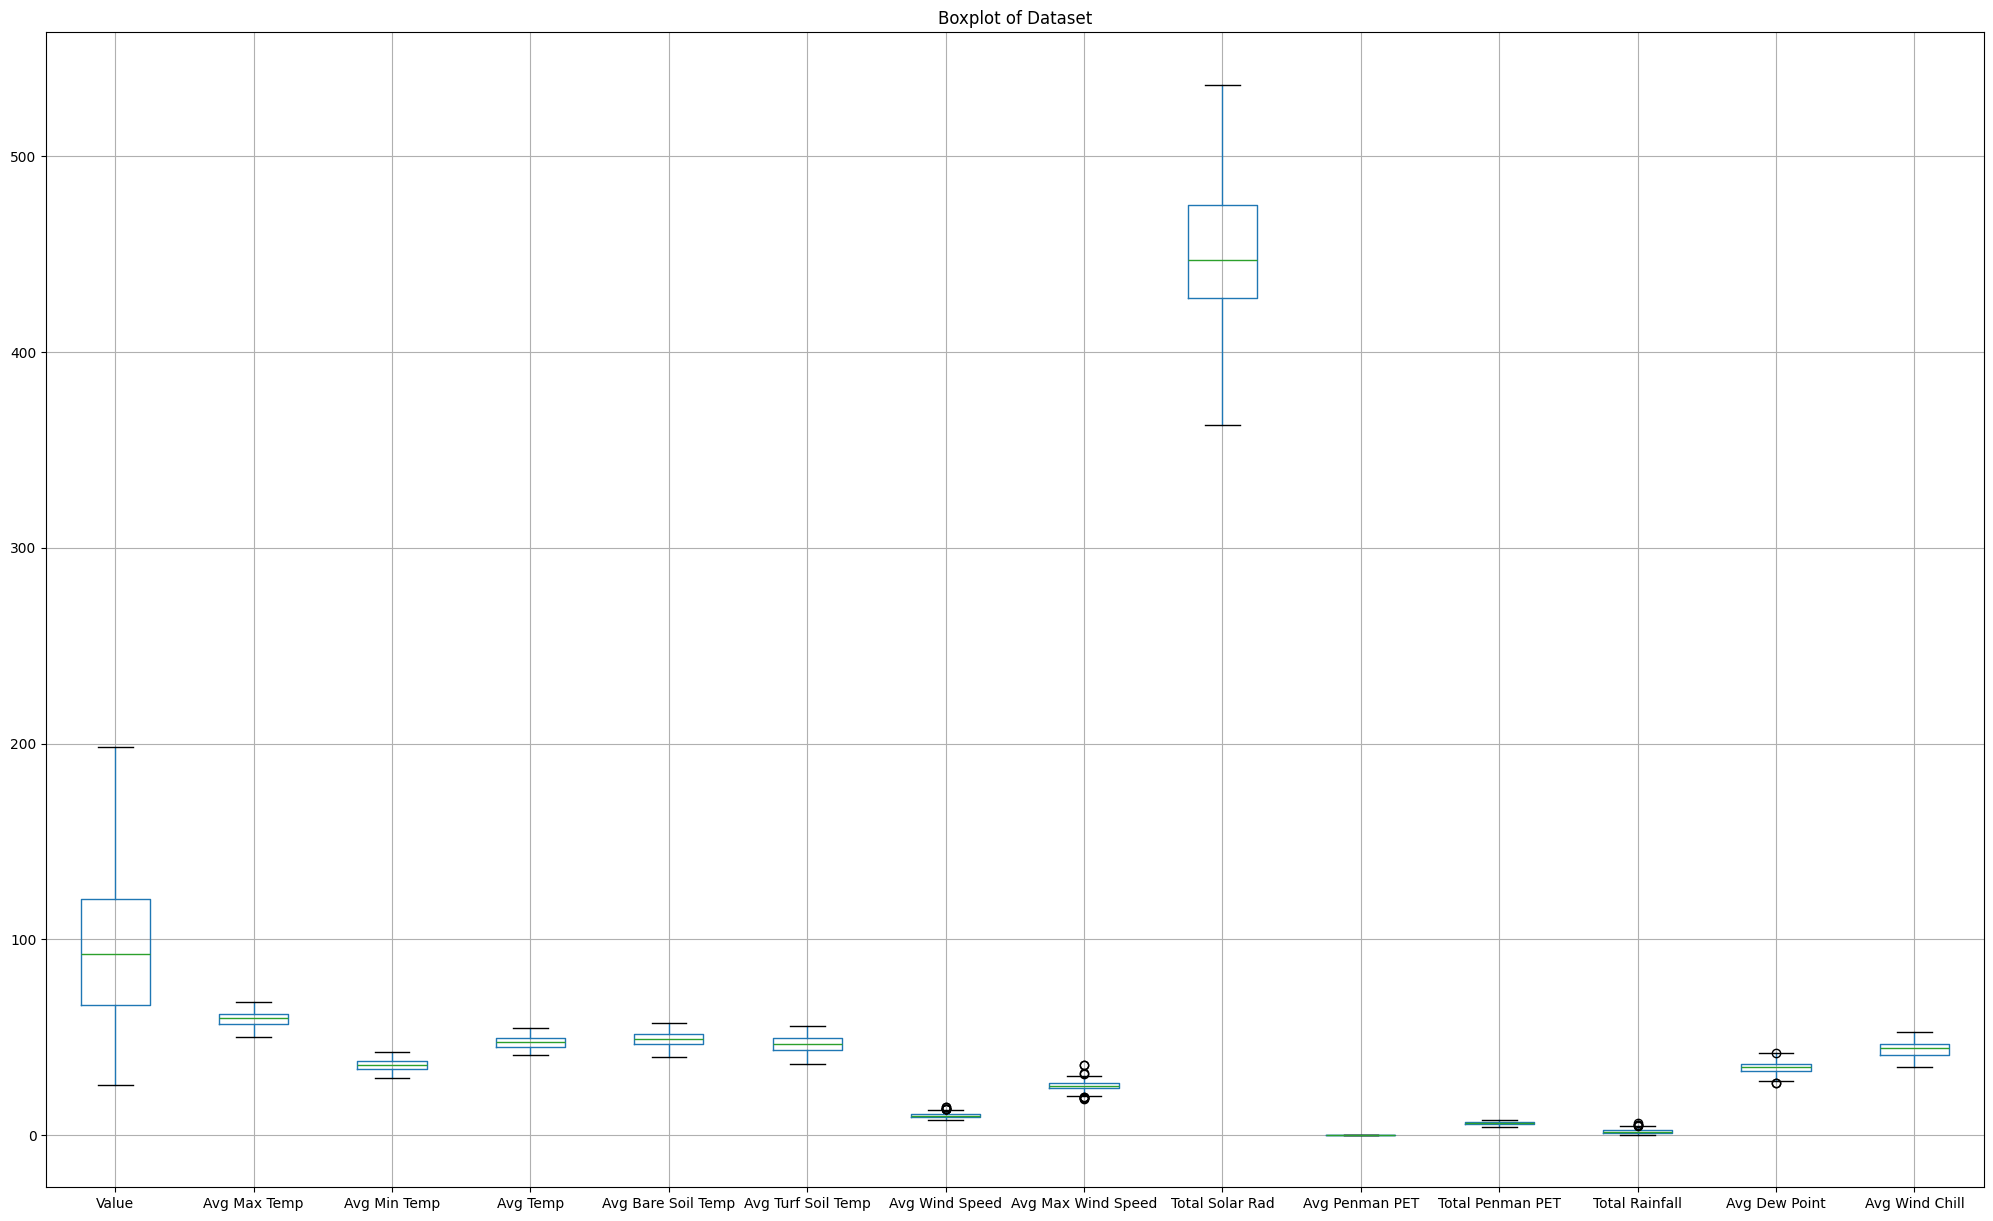

In [ ]:
#shows a boxplot of dataset to detect outliers
df.boxplot(figsize=(25,15))
plt.title('Boxplot of Dataset')
plt.show()

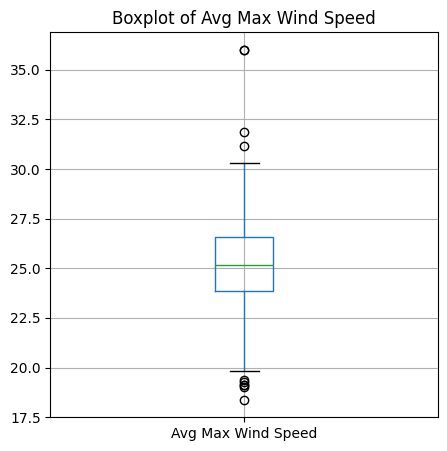

In [ ]:
#boxplot on Avg Max Wind Speed
df.boxplot(column='Avg Max Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Max Wind Speed')
plt.show()

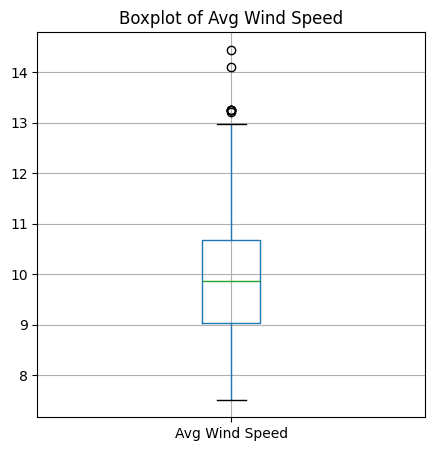

In [ ]:
#boxplot on Avg Wind Speed
df.boxplot(column='Avg Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Wind Speed')
plt.show()

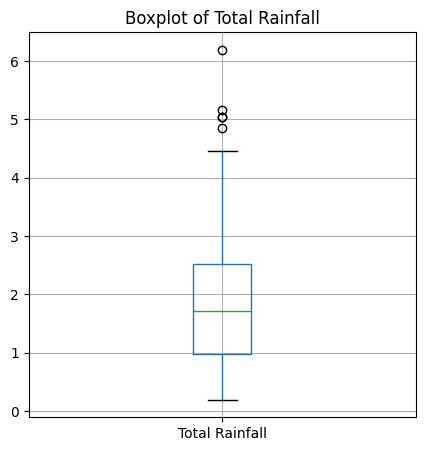

In [ ]:
#boxplot on Total Rainfall
df.boxplot(column='Total Rainfall', figsize=(5,5))
plt.title('Boxplot of Total Rainfall')
plt.show()

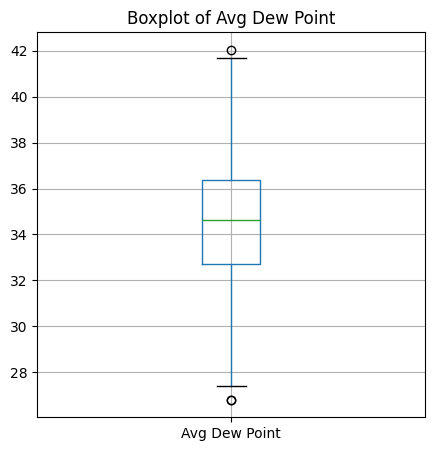

In [ ]:
#boxplot on Avg Dew Point
df.boxplot(column='Avg Dew Point', figsize=(5,5))
plt.title('Boxplot of Avg Dew Point')
plt.show()

In [ ]:
df.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.866484,25.079365,448.886152,0.198280,6.067767,1.883360,34.407533,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,1.259208,2.396947,32.467450,0.027049,0.827335,1.055247,3.096325,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,7.519000,18.379000,362.750000,0.138500,4.244000,0.192500,26.804500,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.031375,23.834875,427.737875,0.180500,5.535125,0.970000,32.714625,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500,25.149250,446.897000,0.202250,6.168250,1.707250,34.651500,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,10.669875,26.591375,475.160500,0.218500,6.685500,2.514125,36.387750,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,14.441500,36.001000,536.538000,0.248500,7.669000,6.194500,42.040500,52.869500


Z-Score (also known as the Standard Score) method calculates how many standard deviations a data point is from the mean.

Data points with a Z-score greater than 3 or less than -3 are considered outliers.

In [ ]:
#detects outliers for Avg Max Wind Speed
from scipy import stats
z = np.abs(stats.zscore(df['Avg Max Wind Speed']))
print(z)

0      0.793799
1      1.237125
2      0.471158
3      0.232843
4      0.794844
         ...   
281    0.753373
282    0.744066
283    1.401259
284    1.703003
285    1.688585
Name: Avg Max Wind Speed, Length: 286, dtype: float64


In [ ]:
#detects outliers for Avg Wind Speed
from scipy import stats
z = np.abs(stats.zscore(df['Avg Wind Speed']))
print(z)

0      1.597833
1      0.000385
2      1.822971
3      1.214780
4      1.867522
         ...   
281    0.685372
282    0.751774
283    0.821012
284    0.741060
285    0.418865
Name: Avg Wind Speed, Length: 286, dtype: float64


In [ ]:
#detects outliers for Total Rainfall
from scipy import stats
z = np.abs(stats.zscore(df['Total Rainfall']))
print(z)

0      0.476894
1      0.368464
2      0.287298
3      1.085399
4      0.370362
         ...   
281    0.871805
282    0.628099
283    1.094892
284    0.472887
285    1.233491
Name: Total Rainfall, Length: 286, dtype: float64


In [ ]:
#detects outliers for Avg Dew Point
from scipy import stats
z = np.abs(stats.zscore(df['Avg Dew Point']))
print(z)

0      0.154636
1      1.183806
2      1.942159
3      1.262747
4      0.564408
         ...   
281    0.578946
282    0.765460
283    0.090901
284    1.864005
285    1.601623
Name: Avg Dew Point, Length: 286, dtype: float64


To define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [ ]:
#removes outliers with Z-Score
threshold_z = 3

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)


Original DataFrame Shape: (286, 14)
DataFrame Shape after Removing Outliers: (286, 14)


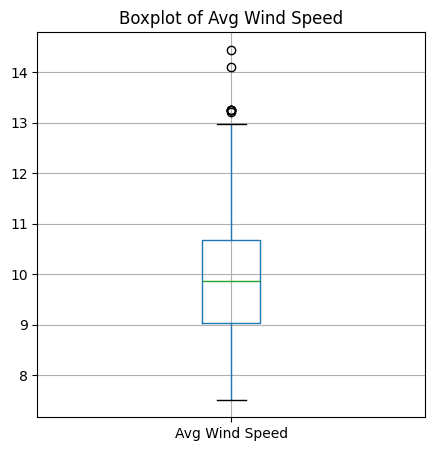

In [ ]:
#boxplot on Avg Wind Speed
df.boxplot(column='Avg Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Wind Speed')
plt.show()

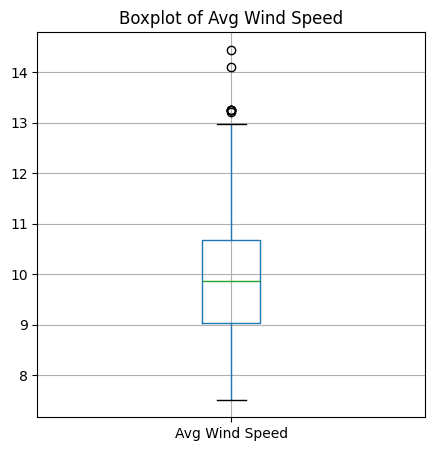

In [ ]:
#boxplot on Avg Wind Speed
df.boxplot(column='Avg Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Wind Speed')
plt.show()

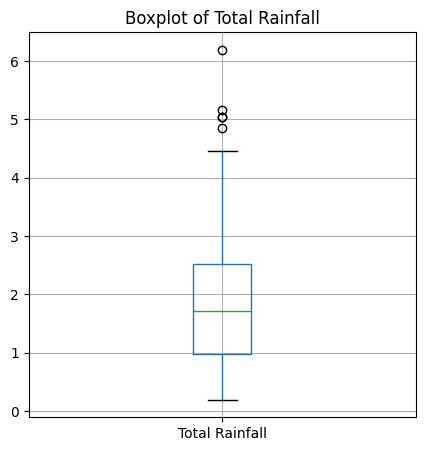

In [ ]:
#boxplot on Total Rainfall
df.boxplot(column='Total Rainfall', figsize=(5,5))
plt.title('Boxplot of Total Rainfall')
plt.show()

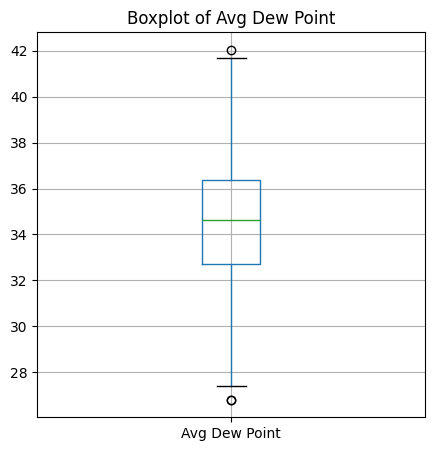

In [ ]:
#boxplot on Avg Dew Point
df.boxplot(column='Avg Dew Point', figsize=(5,5))
plt.title('Boxplot of Avg Dew Point')
plt.show()

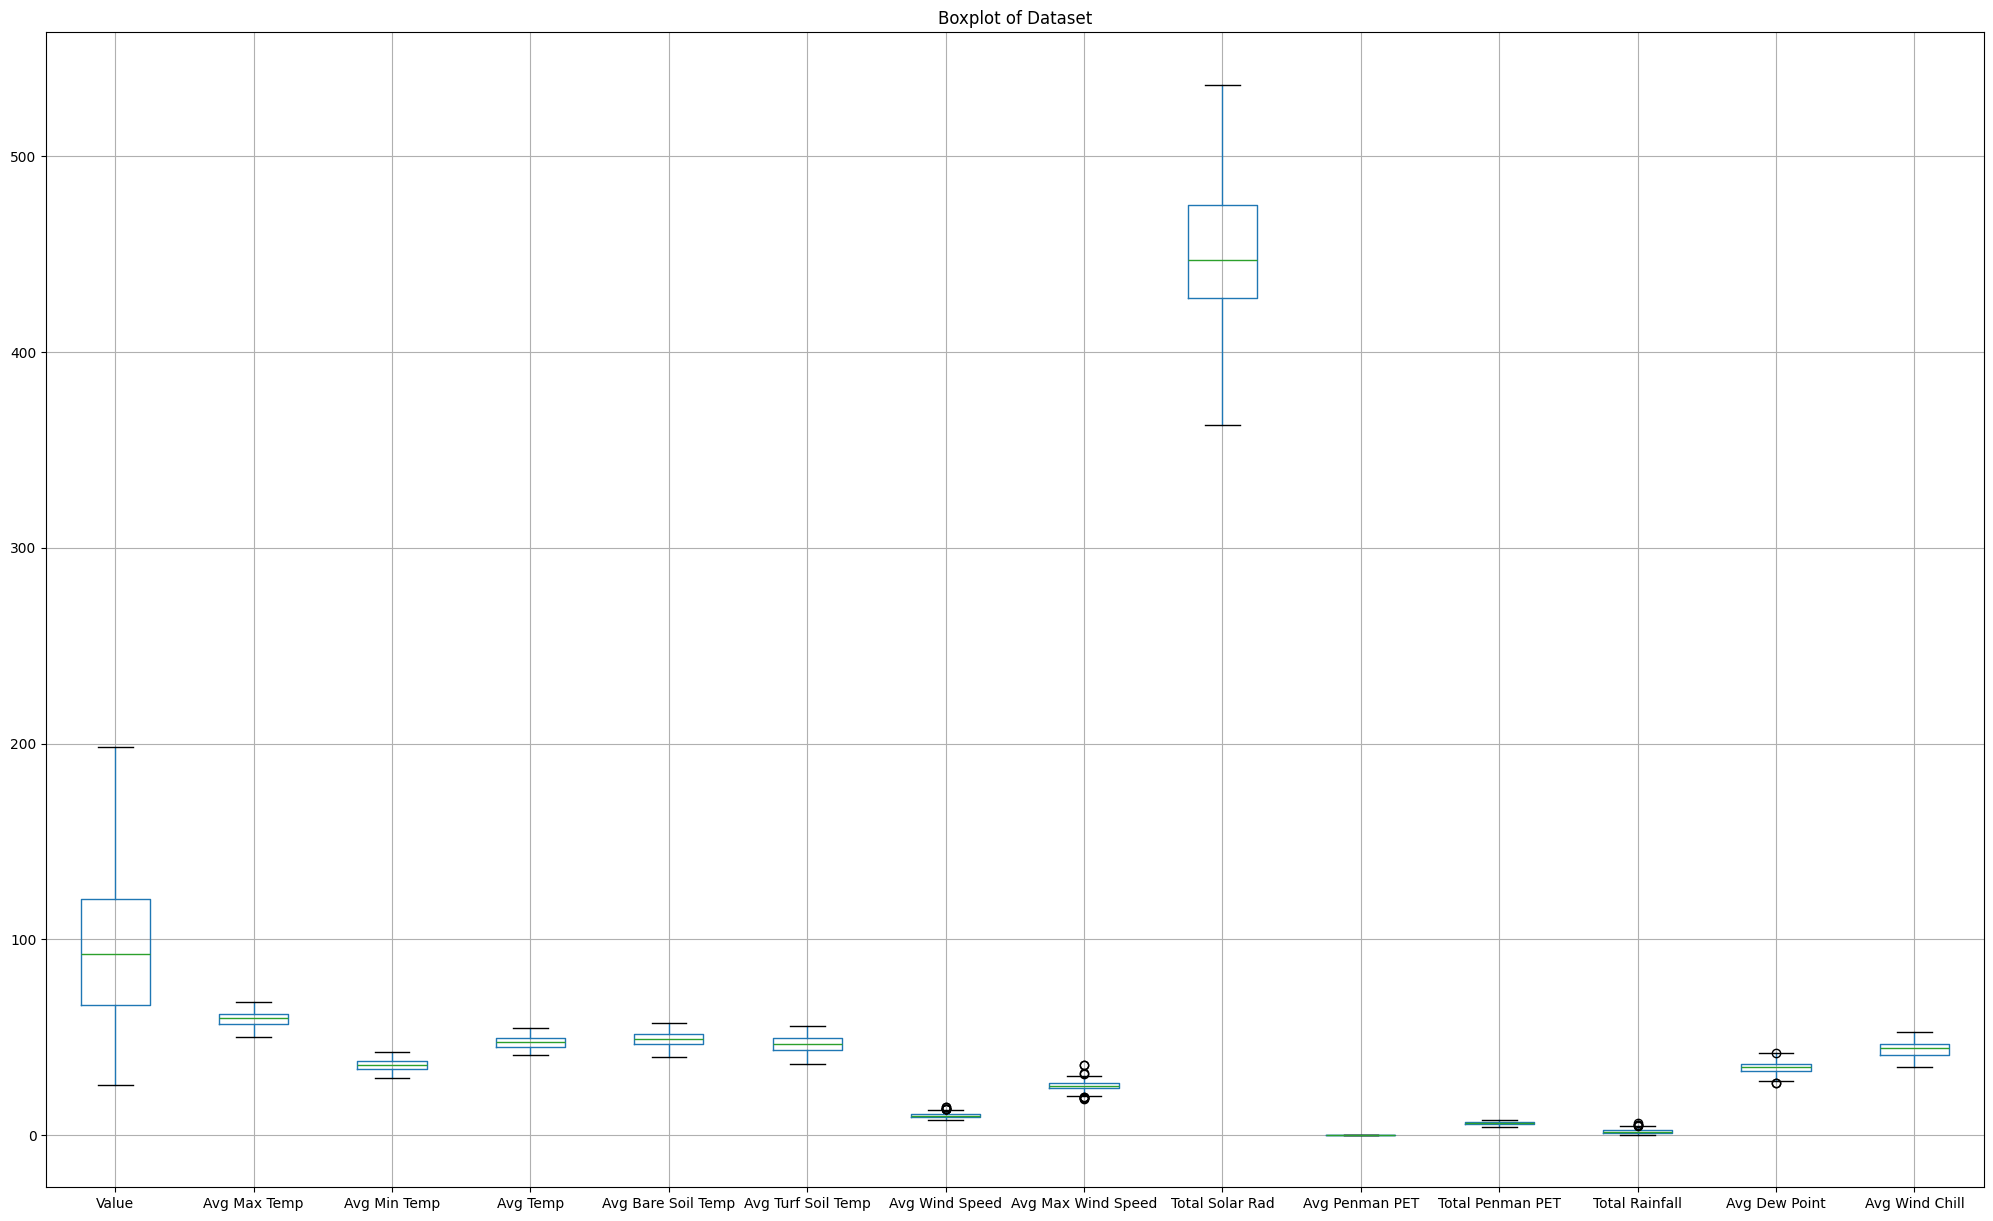

In [ ]:
#shows a boxplot of dataset to detect outliers
df.boxplot(figsize=(25,15))
plt.title('Boxplot of Dataset')
plt.show()